
                                                                              Question: 1
Write an efficient algorithm that searches for a value target in an m x n integer matrix. This matrix has the following properties:

1.Integers in each row are sorted from right to left.

2.The first integer of each row is greater than the last integer of the previous row.

                              Example-: 

                                        Input: matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]], target = 3

                                         Output: True

In [1]:
def search_matrix(matrix, target):
    if not matrix or not matrix[0]:
        return False

    rows, cols = len(matrix), len(matrix[0])
    row, col = 0, cols - 1

    while row < rows and col >= 0:
        current_value = matrix[row][col]

        if current_value == target:
            return True
        elif current_value < target:
            row += 1
        else:
            col -= 1

    return False

# Example usage
matrix = [[1, 3, 5, 7], [10, 11, 16, 20], [23, 30, 34, 60]]
target = 3
result = search_matrix(matrix, target)
print(result)


True


 Question: 2

2.  Write a program that takes a string as input, and counts the frequency of each word in the string, there might  be repeated characters in the string. Your task is to find the highest frequency and returns the length of the  highest-frequency word. 

Note - You have to write at least 2 additional test cases in which your program will run successfully and provide  an explanation for the same.  

Example input - string = “write write write all the number from from from 1 to 100” 

Example output - 5 

Explanation - From the given string we can note that the most frequent words are “write” and “from” and  the maximum value of both the values is “write” and its corresponding length is 5 

In [2]:
def highest_length(string):
    word_freq = {}

    # Split the string into words
    words = string.split()

    # Count the frequency of each word
    for word in words:
        word_freq[word] = word_freq.get(word, 0) + 1

    max_word = max(word_freq, key=word_freq.get)

    return len(max_word)

string = "write write write all the number from from from 1 to 100"
result = highest_length(string)
print(result)


5


Machine learning:

Total Marks: 30
Each question 15 marks   
                                                                

 Question: 1

1. Imagine you have a dataset where you have different Instagram features like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is to predict the number of likes and Time Since posted and the rest of the features are your input features. Now you have to build a model which can predict the number of likes and Time Since posted. 
Dataset This is the Dataset You can use this dataset for this question. 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data=pd.read_csv('instagram_reach.csv')

In [5]:
data.head(10)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
5,5,6,be.masterly,Cyber attacks are more frequent every day and ...,1231,#edtech #learning#educationtechnology #tech #l...,3 hours,18
6,6,7,lenovoworkstations,Check it out – we’re walking across the 🌎’s fi...,259,.#Tech #virtualreality #IoT #Machinelearning,3 hours,35
7,7,8,kirellb,Here's a network I made that depicts the scien...,1433,#datascientist #creativetechnology#design #art...,4 hours,86
8,8,9,ethicsandai,Having a great week at @ldntechweek exploring ...,13,#LTW #London #TechXLR8 #Technology#AI #Artific...,4 hours,22
9,9,10,diworksolucionesdeti,The Internet of Things : A Very Short Story [#...,450,[#Infographic] #Wearable #Sensors #MachineLear...,7 hours,18


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [7]:
data.dtypes

Unnamed: 0            int64
S.No                  int64
USERNAME             object
Caption              object
Followers             int64
Hashtags             object
Time since posted    object
Likes                 int64
dtype: object

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,100.0,8.94,6.639064,0.0,4.00,8.0,12.25,26.0
S.No,100.0,16.24,7.384286,1.0,10.75,16.5,22.25,30.0
Followers,100.0,961.96,1014.625670,11.0,252.75,612.0,1197.00,4496.0
Likes,100.0,46.48,55.086980,8.0,19.00,29.0,46.00,349.0


In [9]:
data.duplicated().sum()

0

In [10]:
data.nunique()

Unnamed: 0           27
S.No                 30
USERNAME             95
Caption              94
Followers            94
Hashtags             98
Time since posted    11
Likes                55
dtype: int64

In [11]:
data.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [12]:
data.isnull().sum().sum()

6

In [13]:
# Data Preprocessing

data['Time since posted'] = data['Time since posted'].str.extract('(\d+)').astype(float)


In [14]:
selected_features = ['Followers', 'Time since posted']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [16]:
# Data Splitting
X_train, X_test, y_train_likes, y_test_likes, y_train_time, y_test_time = train_test_split(
    data[selected_features], data['Likes'], data['Time since posted'], test_size=0.2, random_state=42
)

In [17]:
# Model Building
rf_likes_model = RandomForestRegressor()
rf_time_model = RandomForestRegressor()

gb_likes_model = GradientBoostingRegressor()
gb_time_model = GradientBoostingRegressor()

svr_likes_model = SVR()
svr_time_model = SVR()

knn_likes_model = KNeighborsRegressor()
knn_time_model = KNeighborsRegressor()

lr_likes_model = LinearRegression()
lr_time_model = LinearRegression()





In [18]:
# Fit the models
rf_likes_model.fit(X_train, y_train_likes)
rf_time_model.fit(X_train, y_train_time)

gb_likes_model.fit(X_train, y_train_likes)
gb_time_model.fit(X_train, y_train_time)

svr_likes_model.fit(X_train, y_train_likes)
svr_time_model.fit(X_train, y_train_time)

knn_likes_model.fit(X_train, y_train_likes)
knn_time_model.fit(X_train, y_train_time)

lr_likes_model.fit(X_train, y_train_likes)
lr_time_model.fit(X_train, y_train_time)



LinearRegression()

In [19]:
# Model Evaluation
rf_likes_predictions = rf_likes_model.predict(X_test)
rf_time_predictions = rf_time_model.predict(X_test)

gb_likes_predictions = gb_likes_model.predict(X_test)
gb_time_predictions = gb_time_model.predict(X_test)

svr_likes_predictions = svr_likes_model.predict(X_test)
svr_time_predictions = svr_time_model.predict(X_test)

knn_likes_predictions = knn_likes_model.predict(X_test)
knn_time_predictions = knn_time_model.predict(X_test)

lr_likes_predictions = lr_likes_model.predict(X_test)
lr_time_predictions = lr_time_model.predict(X_test)



In [20]:
# Evaluate the models using Mean Absolute Error
mae_rf_likes = mean_absolute_error(y_test_likes, rf_likes_predictions)
mae_rf_time = mean_absolute_error(y_test_time, rf_time_predictions)

mae_gb_likes = mean_absolute_error(y_test_likes, gb_likes_predictions)
mae_gb_time = mean_absolute_error(y_test_time, gb_time_predictions)

mae_svr_likes = mean_absolute_error(y_test_likes, svr_likes_predictions)
mae_svr_time = mean_absolute_error(y_test_time, svr_time_predictions)

mae_knn_likes = mean_absolute_error(y_test_likes, knn_likes_predictions)
mae_knn_time = mean_absolute_error(y_test_time, knn_time_predictions)

mae_lr_likes = mean_absolute_error(y_test_likes, lr_likes_predictions)
mae_lr_time = mean_absolute_error(y_test_time, lr_time_predictions)

In [21]:
# Print MAE for each model
print(f'Random Forest - MAE Likes: {mae_rf_likes}, MAE Time: {mae_rf_time}')
print(f'Gradient Boosting - MAE Likes: {mae_gb_likes}, MAE Time: {mae_gb_time}')
print(f'SVR - MAE Likes: {mae_svr_likes}, MAE Time: {mae_svr_time}')
print(f'KNN - MAE Likes: {mae_knn_likes}, MAE Time: {mae_knn_time}')
print(f'Linear Regression - MAE Likes: {mae_lr_likes}, MAE Time: {mae_lr_time}')

Random Forest - MAE Likes: 13.868499999999997, MAE Time: 0.26349999999999996
Gradient Boosting - MAE Likes: 11.378245432592193, MAE Time: 0.19583215855528455
SVR - MAE Likes: 23.19409315910763, MAE Time: 1.9829009853144612
KNN - MAE Likes: 21.410000000000004, MAE Time: 1.7900000000000003
Linear Regression - MAE Likes: 18.497853347786, MAE Time: 8.659739592076221e-16


# Explain how you can implement ML in a real world application.

Answer:

Define Objective: Clearly identify the problem you want to solve with machine learning, like image recognition or predicting sales.

Collect Data: Gather relevant data for training your model, ensuring it represents real-world scenarios.

Preprocess Data: Clean and format the data, handling missing values and outliers to improve model accuracy.

Choose Model: Select a suitable machine learning algorithm based on your problem, such as linear regression or neural networks.

Train Model: Use your prepared data to teach the model patterns and relationships.

Evaluate Model: Assess your model's performance using separate data to check for accuracy and adjust as needed.

Deploy Model: Implement your trained model into the real-world system, making predictions on new data.

Monitor Performance: Continuously track how well your model is performing and update as needed.

Iterate and Improve: Refine your model based on feedback and new data, ensuring it stays effective over time.

Scale Up: If successful, deploy the model on a larger scale, adapting it to evolving needs and integrating it into the workflow.

                                                                   Question: 2
2. Explain how you can implement ML in a real world application.

Train an SVM regressor on : Bengaluru housing dataset

                  Must include in details:

                           - EDA

                            - Feature engineering 

In [22]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [23]:
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [25]:
df.shape

(13320, 9)

In [26]:
df.duplicated().sum()

529

In [27]:
df = df.drop_duplicates()

In [28]:
df.duplicated().sum()

0

In [29]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [30]:
df.isnull().sum().sum()

6023

In [31]:
# 1. Handling 'location' missing value
df = df.dropna(subset=['location'])

# 2. Handling 'size' missing values
# Fill with the most common size
most_common_size = df['size'].mode()[0]
df['size'].fillna(most_common_size, inplace=True)

# 3. Dropping 'society' column
df = df.drop(columns=['society'])

# 4. Handling 'bath' and 'balcony' missing values
# Fill with mean values
df['bath'].fillna(df['bath'].mean(), inplace=True)
df['balcony'].fillna(df['balcony'].mean(), inplace=True)


In [32]:
df.isnull().sum().sum()

0

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,12790.0,2.708579,1.353934,1.0,2.0,2.0,3.0,40.0
balcony,12790.0,1.582273,0.802869,0.0,1.0,2.0,2.0,3.0
price,12790.0,114.319860,151.486026,8.0,50.0,73.0,121.0,3600.0


In [34]:
df.nunique()

area_type          4
availability      81
location        1305
size              31
total_sqft      2117
bath              20
balcony            5
price           1994
dtype: int64

In [35]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price'],
      dtype='object')

In [36]:
cat_features=[col for col in df.columns if df[col].dtype =='O']
num_features=[col for col in df.columns if df[col].dtype !='O']

In [37]:
cat_features

['area_type', 'availability', 'location', 'size', 'total_sqft']

In [38]:
num_features

['bath', 'balcony', 'price']

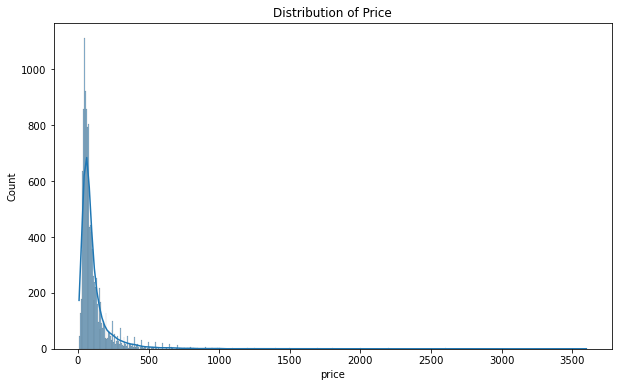

In [39]:
# Visualize distribution of the target variable 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.show()

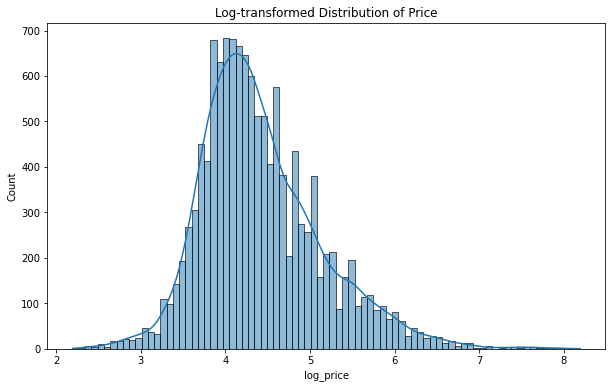

In [40]:
df['log_price'] = np.log1p(df['price'])

# Visualize the log-transformed distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price'], kde=True)
plt.title('Log-transformed Distribution of Price')
plt.show()

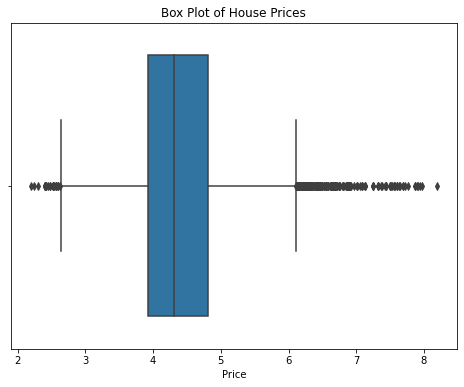

In [41]:
# now we will check the outliers in our price

# Create a box plot for the 'price' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['log_price'])

# Customize the plot
plt.title('Box Plot of House Prices')
plt.xlabel('Price')

# Show the plot
plt.show()

Number of outliers removed: 1257


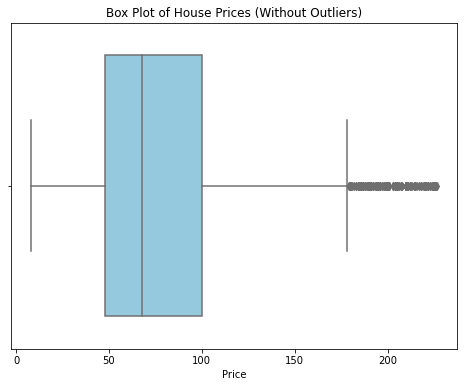

In [42]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the 'price' column
data= df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Display the number of removed outliers
num_outliers_removed = len(df) - len(data)
print(f'Number of outliers removed: {num_outliers_removed}')

# Optionally, plot the box plot for the 'price' column after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['price'], color='skyblue')
plt.title('Box Plot of House Prices (Without Outliers)')
plt.xlabel('Price')
plt.show()

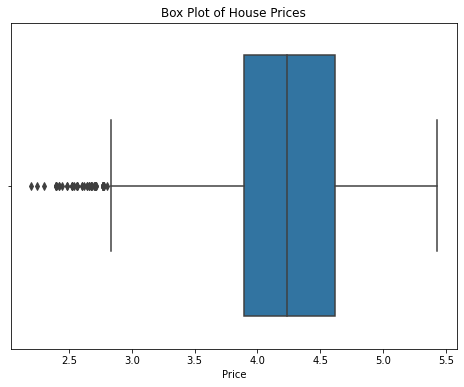

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['log_price'])

# Customize the plot
plt.title('Box Plot of House Prices')
plt.xlabel('Price')

# Show the plot
plt.show()

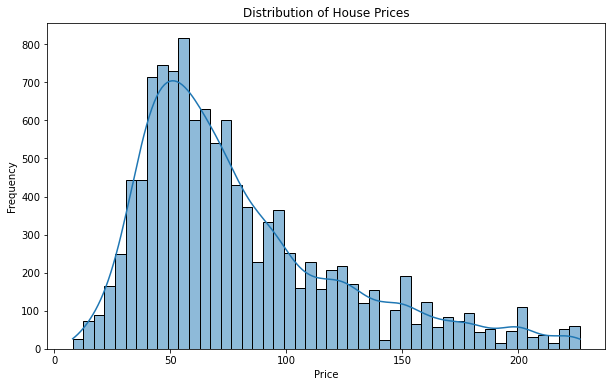

Summary Statistics for 'price':
count    11533.000000
mean        80.082590
std         44.081501
min          8.000000
25%         48.000000
50%         68.000000
75%        100.000000
max        226.500000
Name: price, dtype: float64


In [44]:
# Univiarate analysis


# Create a histogram of the 'price' column
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Display summary statistics
print("Summary Statistics for 'price':")
print(data['price'].describe())

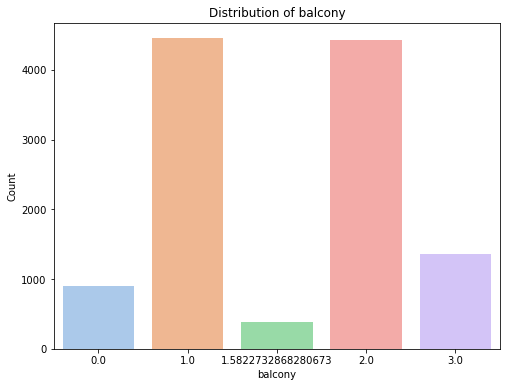

Summary Statistics for 'balcony':
1.000000    4454
2.000000    4432
3.000000    1359
0.000000     905
1.582273     383
Name: balcony, dtype: int64


In [45]:
# Create a countplot for the 'balcony' column
plt.figure(figsize=(8, 6))
sns.countplot(x=data['balcony'], palette='pastel')
plt.title('Distribution of balcony')
plt.xlabel('balcony')
plt.ylabel('Count')
plt.show()

# Display summary statistics
print("Summary Statistics for 'balcony':")
print(data['balcony'].value_counts())


In [46]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price', 'log_price'],
      dtype='object')

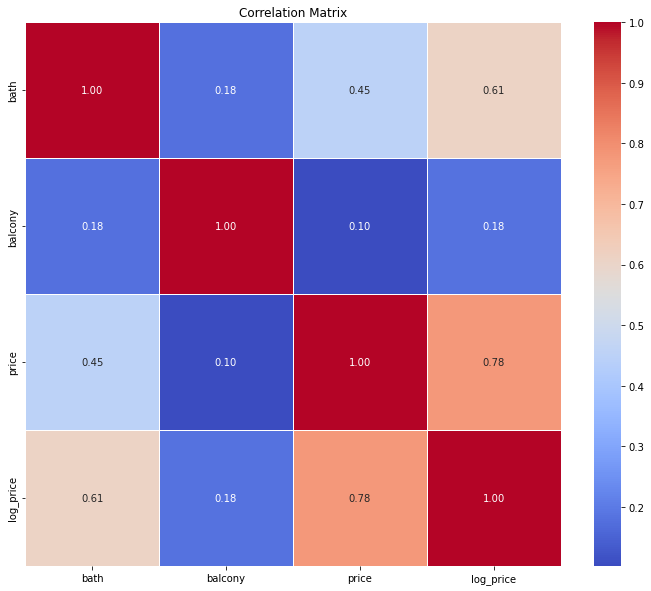

In [47]:
# Bivarate analysis

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

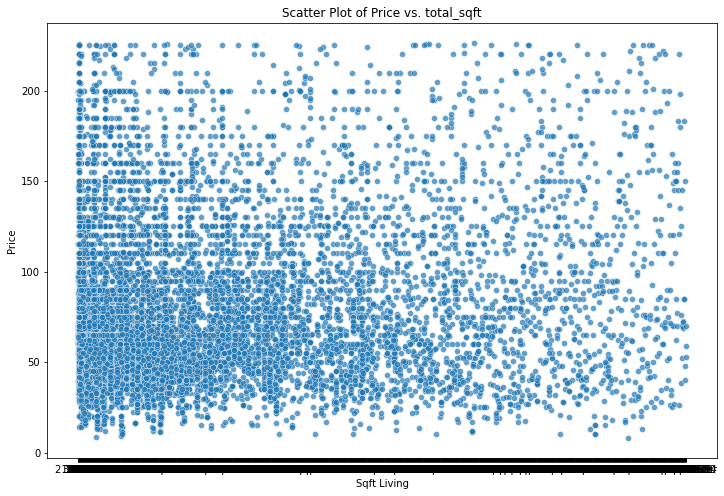

In [70]:
# Scatter plot of 'price' vs 'total_sqft'
plt.figure(figsize=(12, 8))
sns.scatterplot(x='total_sqft', y='price', data=data, alpha=0.7)
plt.title('Scatter Plot of Price vs. total_sqft')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.show()

In [48]:
# Split the data into features (X) and target variable (y)
X = df.drop(['price', 'log_price'], axis=1)
y = df['log_price']


In [49]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [57]:
y_train

10231    4.175617
5060     4.709530
9118     4.203647
11831    6.216606
8942     4.110874
           ...   
12428    4.476882
5279     4.189655
5485     4.234107
861      6.463029
7441     4.060443
Name: log_price, Length: 10232, dtype: float64

In [61]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

In [62]:
# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer,numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [63]:
svm_regressor = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

In [64]:
# Initialize and train an SVM Regressor
svm_regressor.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['bath', 'balcony'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['area_type', 'availability', 'location', 'size', 'total_sqft'], dtype='object'))])),
                ('regressor', SVR())])

In [67]:

predictions = svm_regressor.predict(X_test)

In [68]:
# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error on log-transformed price: {mae}')

Mean Absolute Error on log-transformed price: 0.24835190801444162


In [69]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# R-squared (R2)
r2 = r2_score(y_test, predictions)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

print(f'R-squared (R2): {r2}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

R-squared (R2): 0.7414133147757
Mean Absolute Error (MAE): 0.24835190801444162
Mean Squared Error (MSE): 0.13415108299217798
